Este conjunto de datos se puede utilizar para predecir la gravedad (benigna o maligna)
de una masa mamográfica a partir de los atributos BI-RADS y la edad de la paciente. Contiene una evaluación BI-RADS, la edad del paciente y tres atributos BI-RADS junto con la gravedad para 516 casos benignos y 445 masas malignas que se han identificado en mamografías digitales de campo completo recogidos en el Instituto de Radiología de la Universidad Erlangen-Nuremberg entre 2003 y 2006.
Cada instancia tiene una evaluación BI-RADS asociada que varía de 1 (definitivamente benigna)
a 5 (altamente sugestivo de malignidad) asignado en un proceso de doble revisión por
médicos

### Ejercicio

- Generar un conjunto de entrenamiento y uno de prueba
- Entrenar el modelo
- Hacer predicciones sobre el conjunto de prueba
- Evaluar el modelo

¿El modelo logra clasificar correctamente los casos de prueba?
¿Cómo afectaría en la realidad el error de este modelo?


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Obtener Datos

In [2]:
df = pd.read_csv('C:/Users/rgian/OneDrive/Escritorio/IA_tp/IA-2021/tp3/mammogram_dataset.csv')
df

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


## Limpieza datos erróneos 

(Utilizamos la moda de cada columna para evitar los datos erróneos)

In [3]:
df["density"] = df["density"].replace([-100000], df.mode(axis=0)["density"])
df["BI_RADS_assessment"] = df["BI_RADS_assessment"].replace([-100000], df.mode(axis=0)["BI_RADS_assessment"])
df["shape"] = df["shape"].replace([-100000], df.mode(axis=0)["shape"])
df["margin"] = df["margin"].replace([-100000], df.mode(axis=0)["margin"])
df["BI_RADS_assessment"] = df["BI_RADS_assessment"].replace([55], df.mode(axis=0)["BI_RADS_assessment"])

df.head(50)

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1
5,4,65,1,1,3,0
6,4,70,4,1,3,0
7,5,42,1,1,3,0
8,5,57,1,5,3,1
9,5,60,4,5,1,1


## Subconjunto de Atributos y Clases 

In [4]:
data=df.values[:,1:6]
data

array([[67,  3,  5,  3,  1],
       [43,  1,  1,  3,  1],
       [58,  4,  5,  3,  1],
       ...,
       [64,  4,  5,  3,  0],
       [66,  4,  5,  3,  1],
       [62,  3,  3,  3,  0]], dtype=int64)

In [5]:
target=df.values[:,0]
target

array([5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 5,
       4, 5, 4, 5, 2, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 2, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 3, 5, 4,
       4, 5, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 3, 4, 5, 4, 5, 5,
       4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 3, 4, 5,
       4, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5,
       5, 4, 5, 5, 4, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4,
       3, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 5, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 5, 4, 5,
       4, 4, 4, 3, 4, 2, 4, 5, 4, 4, 4, 4, 4, 4, 2, 5, 5, 4, 4, 4, 5, 3,
       3, 4, 5, 5, 5, 4, 5, 2, 4, 4, 3, 5, 5, 4, 5, 5, 3, 4, 4, 4, 5, 4,
       4, 3, 5, 4, 4, 5, 4, 3, 4, 5, 4, 4, 5, 3, 5, 5, 5, 5, 5, 4, 4, 4,
       5, 4, 5, 3, 5, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5,

## Crear Conjunto de entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,random_state=109)

## Entrenar modelo

In [7]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

## Obtener Predicciones

In [8]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 4, 4, 4, 4, 4, 4, 0, 6, 4, 0, 0, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4,
       0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       4, 0, 0, 0, 4, 4, 0, 4, 4, 5, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 6, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0,
       4, 0, 6, 4, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 4,
       4, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 6, 4, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 4, 4, 0, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 6,
       4, 4, 4, 0, 0, 4, 4, 6, 4, 4, 4, 4, 6, 4, 0, 5, 4, 4, 0, 4, 4, 4,
       4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 2, 4, 4,
       4, 0, 4, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4], dtype=int64)

## Comprobar Predicciones

In [9]:
 metrics.accuracy_score(y_test, y_pred)

0.5121107266435986

## Gráfico

In [10]:
metrics.confusion_matrix(y_test, y_pred)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,   0,   0],
       [  0,   1,   0,   7,   0,   0],
       [ 16,   2,   0, 147,   1,   2],
       [ 48,   1,   0,  50,   1,   8],
       [  0,   0,   0,   1,   0,   0]], dtype=int64)

## Matriz de Confusión 

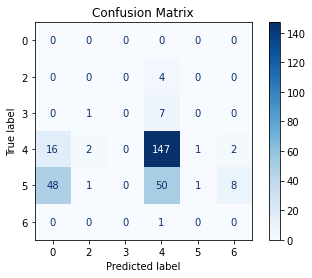

In [11]:
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### ¿El modelo logra clasificar correctamente los casos de prueba? ¿Cómo afectaría en la realidad el error de este modelo?

El modelo no logra clasificar los casos de prueba. Afectaría de manera grave ya que puede dar falsos positivos y/o falsos. De modo que una persona que no esté enferma, puede diagnoticarse enferma y una persona enferma puede diagnoticarse saludable. 